
## Real estate data cleaning with Pandas for efficient analysis

This is a real dataset that was downloaded using web scraping techniques. The data contains records from Fotocasa, one of the most popular real estate websites in Spain. Please do not perform web scraping unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and no economic benefit was obtained from it.

It contains thousands of real house listings published on the website www.fotocasa.com. Your goal is to extract as much information as possible with the data science knowledge you have acquired so far.

Let's get started!

- First, let's read and explore the dataset.



In [2]:
# step 0. load libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# step 1. load data
df_raw = pd.read_csv("../real_estate.csv",sep=";")
df_raw.sample(10)






,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
9245,9246,153964839,False,neximo,932991681.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,1.0,1.0,54.0,225000,...,0,0,0,0,0,1,"40,42619","-3,70314",NaN,NaN
9411,9412,153964224,False,vivienda madrid usera plaza eliptica,910920867.0,https://www.fotocasa.es/es/comprar/vivienda/el...,2.0,1.0,56.0,128800,...,0,0,0,0,0,0,"40,389175237983","-3,7080144882202",NaN,NaN
7043,7044,150946205,False,mage servicios profesionales sl,NaN,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,320.0,547000,...,0,0,0,0,0,1,"40,48946","-3,95972",NaN,NaN
6602,6603,153470673,False,neinor homes,954300431.0,https://www.fotocasa.es/vivienda/madrid-capita...,3.0,2.0,134.0,445000,...,0,0,0,0,0,0,"40,5","-3,86768",NaN,NaN
12763,12764,153788633,False,isabel,914875498.0,https://www.fotocasa.es/es/comprar/vivienda/ar...,4.0,2.0,200.0,250000,...,0,0,0,0,0,0,"40,59194","-4,14773",NaN,NaN
6585,6586,151000047,False,living gestion de proyectos,911221479.0,https://www.fotocasa.es/vivienda/madrid-capita...,3.0,2.0,185.0,0,...,0,0,0,0,0,0,"40,43416","-3,81772",NaN,NaN
2011,2012,153117319,False,berkshire hathaway homeservices larvia,914891596.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,94.0,553000,...,0,0,0,0,0,1,"40,44672","-3,6636",NaN,NaN
6964,6965,152493915,False,amr inmobiliaria,910920945.0,https://www.fotocasa.es/es/comprar/vivienda/pa...,4.0,2.0,101.0,184900,...,0,0,0,0,0,0,"40,2412004","-3,7775889",NaN,NaN
12638,12639,153423039,False,outletdeviviendas,912172269.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,193.0,175000,...,0,0,0,0,0,0,"40,1112814","-3,16420689",NaN,NaN
7056,7057,153220537,False,vivantial,911368467.0,https://www.fotocasa.es/es/comprar/vivienda/co...,3.0,2.0,109.0,71500,...,0,0,0,0,0,0,"40,4762398","-3,3804349",NaN,NaN


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [4]:
# step 2. prepocessing
df_baking = df_raw.copy()
df_baking = df_baking.iloc[:,1:-2]
df_baking["date"] = pd.to_datetime(df_baking["date"], errors="coerce")
df_baking.columns = df_baking.columns.str.lower()
df_baking = df_baking.drop(columns=["country","countryid","level1id","level2id","level3id","level4id","level5id","level6id","level7id","level8id","accuracy"])
df_baking["id_realestates"] = df_baking["id_realestates"].astype("category")
df_baking["phone_realestate"] = df_baking["phone_realestate"].astype("category")
df_baking["realestate_name"] = df_baking["realestate_name"].astype("category")
df_baking["url_inmueble"] = df_baking["url_inmueble"].astype("category")
df_baking["address"] = df_baking["address"].astype("category")
df_baking["description"] = df_baking["description"].astype("category")
df_baking["latitude"] = df_baking["latitude"].str.replace(",",".")
df_baking["latitude"] = df_baking["latitude"].astype(float)
df_baking["longitude"] = df_baking["longitude"].str.replace(",",".")
df_baking["longitude"] = df_baking["longitude"].astype(float)
df_baking.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id_realestates    15335 non-null  category           
 1   isnew             15335 non-null  bool               
 2   realestate_name   15325 non-null  category           
 3   phone_realestate  14541 non-null  category           
 4   url_inmueble      15335 non-null  category           
 5   rooms             14982 non-null  float64            
 6   bathrooms         14990 non-null  float64            
 7   surface           14085 non-null  float64            
 8   price             15335 non-null  int64              
 9   date              683 non-null    datetime64[ns, UTC]
 10  description       15193 non-null  category           
 11  address           15335 non-null  category           
 12  level1            15335 non-null  object             
 13  l

In [5]:
df = df_baking.copy()
df.sample(5,random_state=2025)

,id_realestates,isnew,realestate_name,phone_realestate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2,level3,level4,level5,level6,level7,level8,upperlevel,latitude,longitude
11956,153704529,False,habita mad,918007061.0,https://www.fotocasa.es/es/comprar/vivienda/gu...,3.0,1.0,72.0,214000,NaT,...,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Hortaleza,Canillas,Canillas,40.464490,-3.632650
7285,150530836,False,desarrollo de viviendas nueva ciudad,916358709.0,https://www.fotocasa.es/vivienda/alcala-de-hen...,3.0,2.0,112.0,243800,NaT,...,Madrid,Zona Sur de Madrid,"Parla, Zona de",Parla,NaN,Centro,NaN,Centro,40.237680,-3.774230
14035,153921873,False,garsierra,912179623.0,https://www.fotocasa.es/es/comprar/vivienda/ti...,1.0,2.0,72.0,85000,NaT,...,Madrid,Corredor del Henares,"Camarma de Esteruelas, Zona de",Camarma de Esteruelas,NaN,NaN,NaN,Camarma de Esteruelas,40.550675,-3.377295
10823,150512853,False,covibarges,912175971.0,https://www.fotocasa.es/vivienda/arganda-del-r...,3.0,2.0,107.0,255000,NaT,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Rivas-Vaciamadrid, Zona de",Rivas-vaciamadrid,NaN,Rivas Urbanizaciones,NaN,Rivas Urbanizaciones,40.382190,-3.530690
5778,148949209,False,urban,912780256.0,https://www.fotocasa.es/es/comprar/vivienda/pa...,4.0,4.0,NaN,439000,NaT,...,Madrid,Zona Suroeste,"Brunete, Zona de",Brunete,NaN,NaN,NaN,Brunete,40.397230,-3.998940


### Exercise 01. 
What is the most expensive house in the entire dataset?

In [6]:
# df_baking["price"].max()
# df_baking[df_baking["price"]== 8500000]
# 
df.sort_values(by="price", ascending=False).head(1)

,id_realestates,isnew,realestate_name,phone_realestate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2,level3,level4,level5,level6,level7,level8,upperlevel,latitude,longitude
13110,132042636,False,engel volkers torrelodones,911798512.0,https://www.fotocasa.es/es/comprar/vivienda/vi...,19.0,NaN,NaN,8500000,NaT,...,Madrid,Zona Noroeste,"El Escorial, Zona de",El Escorial,NaN,Centro - Manquilla,NaN,Centro - Manquilla,40.58308,-4.129519


### Exercise 02. 
What is the cheapest house in the dataset? 

In [7]:
df[df["price"] != 0].sort_values(by="price",ascending=True)[["address","price"]].head(1)

,address,price
7491,"Berlin, Coslada",600



### Exercise 03. 
What is the largest and smallest house in the dataset? (★☆☆)

Print the address and area of the selected houses. For example:

The largest house is located at Calle Gran Vía, Nº38, and its area is 5000 square meters.

The smallest house is located at Calle Mayor, Nº12, and its area is 200 square meters.

This exercise is similar to the previous one, but we are looking for the largest and smallest houses based on their area.


In [8]:
df.sort_values(by="surface", ascending=True).head(1)[["address","surface"]]

,address,surface
498,"Calle Amparo, Madrid Capital",15.0


In [9]:
df.sort_values(by="surface", ascending=False).head(1)[["address","surface"]]

,address,surface
6794,Sevilla la Nueva,249000.0



### Exercise 04. 
How many unique populations are in the dataset? (★☆☆)

Count the number of unique populations in the 'level5' column and print the names of the populations separated by commas. For example:

> print(populations)

population1, population2, population3, ...


In [10]:
level5_list = df["level5"].unique().tolist()
level5_count = df["level5"].nunique()
print(f"hay {level5_count} ciudades y estas son:{",".join(level5_list)}")


hay 168 ciudades y estas son:Arganda del Rey,Fuenlabrada,Boadilla del Monte,Las Rozas de Madrid, Madrid Capital,Villaviciosa de Odón,Pinto,Valdemoro,Navalcarnero,Pozuelo de Alarcón,Torrejón de Ardoz,Navalagamella,San Sebastián de los Reyes,Rivas-vaciamadrid,Alpedrete,Móstoles,San Fernando de Henares,Coslada,Becerril de la Sierra,Alcalá de Henares,Chinchón,Parla,Alcorcón,El Escorial,Leganés,Pedrezuela,Majadahonda,Villanueva de la Cañada,Villanueva del Pardillo,Torrelodones,Moralzarzal,Mejorada del Campo,Aranjuez,Corpa,Getafe,Velilla de San Antonio,Sevilla la Nueva,San Martín de la Vega,Villalbilla,Collado Villalba,Alcobendas,El Molar (Madrid),Moraleja de Enmedio,Algete,Campo Real,Torrejón de la Calzada,Colmenar Viejo,Valdemorillo,Fuente El Saz de Jarama,Tres Cantos,Arroyomolinos (Madrid),Griñón,Paracuellos de Jarama,Guadarrama,Titulcia,Galapagar,Collado Mediano,Los Molinos,San Lorenzo de El Escorial,Loeches,San Martín de Valdeiglesias,Navas del Rey,Bustarviejo,Manzanares El Real,Carabañ


### Exercise 05. 
Does the dataset contain null values (NAs)? (★☆☆)

Print a boolean (True or False) to check if there are null values, followed by the columns that contain NAs.


In [11]:
df.isna().sum()


id_realestates          0
isnew                   0
realestate_name        10
phone_realestate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                14652
description           142
address                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperlevel              0
latitude                0
longitude               0
dtype: int64


### Exercise 06.
Remove the null values (NAs) from the dataset, if applicable (★★☆)

After removing the null values, compare the size of the DataFrame before and after the removal.


In [12]:
df.dropna(subset=["surface"])

,id_realestates,isnew,realestate_name,phone_realestate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2,level3,level4,level5,level6,level7,level8,upperlevel,latitude,longitude
0,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,40.294828,-3.444024
2,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,40.411565,-3.906623
3,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,40.285379,-3.795081
4,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN,Centro,40.299877,-3.452263
5,153934794,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,70.0,315000,2019-12-28 18:27:15.968054700+00:00,...,Madrid,Zona Noroeste,"Las Rozas de Madrid, Zona de",Las Rozas de Madrid,NaN,El Pinar - Punta Galea,NaN,El Pinar - Punta Galea,40.533910,-3.894450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,NaT,...,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Tetuán,Berruguete,Berruguete,40.454160,-3.702860
15331,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,NaT,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN,Velilla de San Antonio,40.366520,-3.489510
15332,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,NaT,...,Madrid,Zona Noroeste,"Torrelodones, Zona de",Torrelodones,NaN,Casco Antiguo,NaN,Casco Antiguo,40.574440,-3.921240
15333,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,NaT,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN,Velilla de San Antonio,40.369670,-3.481050



### Exercise 07. 
What is the average price in the population of "Arroyomolinos (Madrid)"? (★★☆)

Print the value obtained from the 'level5' column.


In [13]:
precio_medio = df[df["level5"]=="Arroyomolinos (Madrid)"]["price"].mean()
print(f"el precio medio en Arroyomolinos es: {precio_medio:.1f}")



el precio medio en Arroyomolinos es: 294541.6



### Exercise 08. 
Plot the histogram of prices for the population of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write a brief analysis of the plot in the Markdown cell.


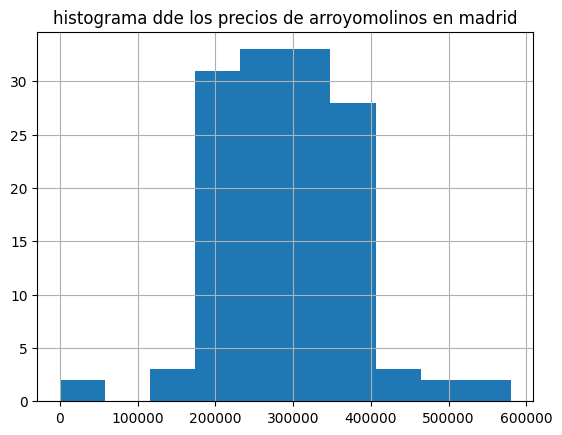

In [14]:
df[df["level5"]=="Arroyomolinos (Madrid)"]["price"].hist()
plt.title("histograma dde los precios de arroyomolinos en madrid")
plt.show()


# 9 58



### Exercise 09.
Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)
Print both average prices and then write a conclusion about them.



In [15]:
valdemorillo = df[df["level5"] == "Valdemorillo"]["price"].mean()
galapagar = df[df["level5"] == "Galapagar"]["price"].mean()

# Imprimir los resultados
print(f"Precio promedio en Valdemorillo: {valdemorillo:,.2f} €")
print(f"Precio promedio en Galapagar: {galapagar:,.2f} €")

# Conclusión simple
if valdemorillo == galapagar:
    print("Los precios promedio son exactamente iguales.")
elif valdemorillo > galapagar:
    print("Valdemorillo tiene un precio promedio más alto que Galapagar.")
else:
    print("Galapagar tiene un precio promedio más alto que Valdemorillo.")

Precio promedio en Valdemorillo: 363,860.29 €
Precio promedio en Galapagar: 360,063.20 €
Valdemorillo tiene un precio promedio más alto que Galapagar.



### Exercise 10. 
Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called pps (price per square meter) and then analyze the values.




In [16]:
city1 = "Valdemorillo"
city2 = "Galapagar"
pps_valdemorillo = df.assign(price_per_area=df["price"]/df["surface"]).query("level5==@city1")["price_per_area"].mean()
pps_galapagar= df.assign(price_per_area=df["price"]/df["surface"]).query("level5==@city2")["price_per_area"].mean()
print(f"el precio promedio de galapagar es{pps_galapagar:.1f}y el precio de valdemorillo es {pps_valdemorillo:.1f}")

el precio promedio de galapagar es1606.3y el precio de valdemorillo es 1318.0


### Exercise 11. 
Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a scatter plot, then write a conclusion about it.


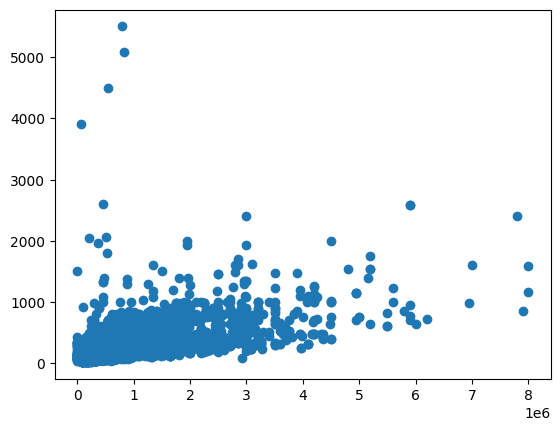

In [17]:
plt.scatter(df[df["surface"]<10000]["price"],df[df["surface"]<10000]["surface"])
plt.show()


### Exercise 12. 
How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.


In [18]:
agencias_inmobiliarias = df["realestate_name"].nunique()
print(f"hay {agencias_inmobiliarias} agencias inmobiliarias")

hay 1821 agencias inmobiliarias


### Exercise 13. 
Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.


In [19]:
df.groupby(by="level5").size().sort_values(ascending=False)

level5
 Madrid Capital         6643
Alcalá de Henares        525
Las Rozas de Madrid      383
Móstoles                 325
Getafe                   290
                        ... 
Montejo de la Sierra       1
Lozoya                     1
Pinilla del Valle          1
Rascafría                  1
Piñuécar-gandullas         1
Length: 168, dtype: int64


### Exercise 14. 
Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column level5 and the function isin.


In [20]:
poblaciones_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
df_sur = df[df['level5'].isin(poblaciones_sur)].copy()
print(df_sur.head())

    id_realestates  isnew                    realestate_name phone_realestate  \
1        153867863  False  tecnocasa fuenlabrada ferrocarril      916358736.0   
3        152776331  False  tecnocasa fuenlabrada ferrocarril      916358736.0   
85       153152077  False            sinergical inmobiliaria              NaN   
94       153995577  False                    viviendas365com      911226014.0   
109      153586414  False    area uno asesores inmobiliarios      912664081.0   

                                          url_inmueble  rooms  bathrooms  \
1    https://www.fotocasa.es/es/comprar/vivienda/ma...    3.0        1.0   
3    https://www.fotocasa.es/es/comprar/vivienda/ma...    3.0        1.0   
85   https://www.fotocasa.es/es/comprar/vivienda/le...    1.0        1.0   
94   https://www.fotocasa.es/es/comprar/vivienda/le...    3.0        2.0   
109  https://www.fotocasa.es/es/comprar/vivienda/ma...    3.0        3.0   

     surface   price                                date


### Exercise 15. 
Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.


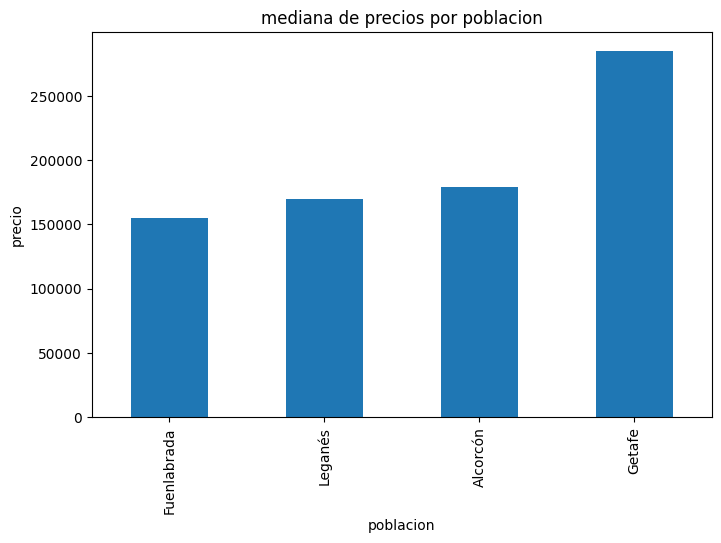

In [21]:
medianas = df_sur.groupby("level5")["price"].median().sort_values()
plt.figure(figsize=(8, 5))
medianas.plot(kind="bar")
plt.title("mediana de precios por poblacion")
plt.ylabel("precio")
plt.xlabel("poblacion")
plt.show()


## analisis
En el gráfico observamos la mediana de los precios de vivienda en cuatro municipios del cinturón sur de Madrid: **Alcorcón**, **Fuenlabrada**, **Getafe** y **Leganés**.

Podemos notar que:

- **Getafe** y **Alcorcón** tienden a tener precios medianos más altos que **Fuenlabrada** y **Leganés**.
- Las diferencias no son extremadamente grandes, pero sí muestran una ligera variación entre municipios.
- Esto puede deberse a factores como la cercanía a Madrid capital, infraestructuras, oferta de servicios o demanda inmobiliaria local.



### Exercise 16. 
Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.


In [22]:
variables = ["price","rooms","surface","bathrooms"]
for var in variables:
    media = df_sur[var].mean()
    varianza = df_sur[var].var()
    print(f"variable: {var}")
    print(f" media: {media:.1f}")
    print(f" varianza: {varianza:.1f}")
    print("-" * 30)

variable: price
 media: 223094.5
 varianza: 14921367508.0
------------------------------
variable: rooms
 media: 3.0
 varianza: 0.7
------------------------------
variable: surface
 media: 111.8
 varianza: 4263.1
------------------------------
variable: bathrooms
 media: 1.6
 varianza: 0.6
------------------------------



### Exercise 17. 
What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.


In [23]:
idx_maximos = df_sur.groupby("level5")["price"].idxmax()
casas_mas_caras = df_sur.loc[idx_maximos, ["level5", "address", "price"]]
print(casas_mas_caras)


            level5                                address    price
5585      Alcorcón                               Alcorcón   950000
11561  Fuenlabrada  Calle de Paulo Freire, 5, Fuenlabrada   490000
2881        Getafe                                 Getafe  1050000
10412      Leganés           Avenida Reina Sofía, Leganés   650000



### Exercise 18. 
Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the multihist demo of Matplotlib.


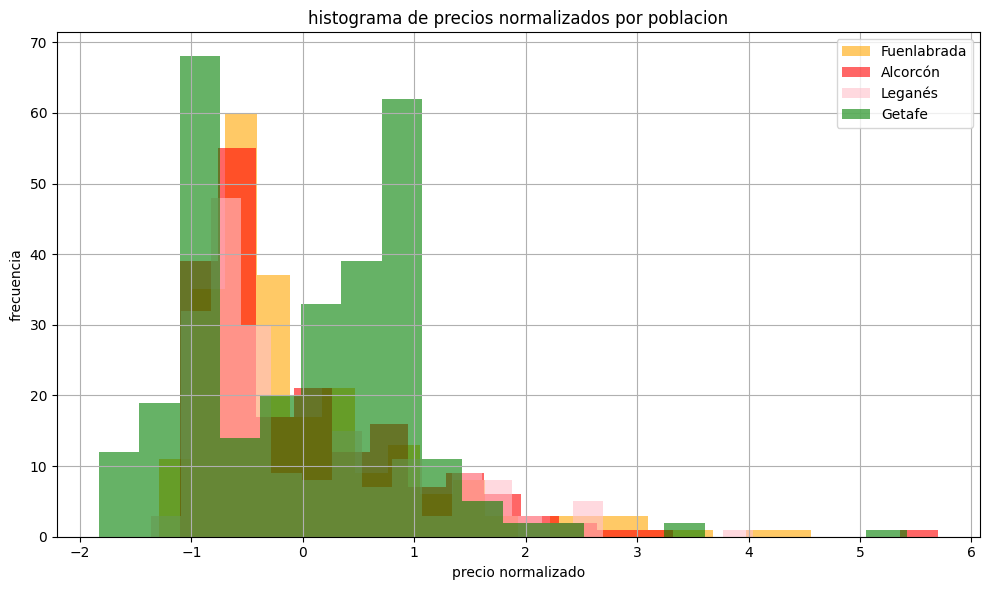

In [24]:
df_sur["normalized_price"] = df_sur.groupby("level5")["price"].transform(
    lambda x: (x - x.mean()) / x.std()
)
colores = {
    "Alcorcón": "red",
    "Fuenlabrada": "orange",
    "Getafe": "green",
    "Leganés": "pink"
}
plt.figure(figsize=(10, 6))
for poblacion in df_sur["level5"].unique():
    precios = df_sur[df_sur["level5"]== poblacion]["normalized_price"]
    plt.hist(precios, bins=20, alpha=0.6, label=poblacion, color=colores[poblacion])
plt.title("histograma de precios normalizados por poblacion")
plt.xlabel("precio normalizado")
plt.ylabel("frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()    

### Análisis del histograma de precios normalizados

En el gráfico se muestran los histogramas de los precios normalizados para las poblaciones de Alcorcón, Fuenlabrada, Getafe y Leganés.
- La **forma del histograma** da una idea de la simetría o sesgo en los precios.

La normalización permite comparar mejor las distribuciones, eliminando diferencias de escala entre poblaciones.

### Exercise 19. 
What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called pps (price per square meter) and then analyze the values.

In [25]:
df_sur["pps"] = df_sur["price"] / df_sur["surface"]
df_getafe = df_sur[df_sur["level5"] == "Getafe"]
df_alcorcon = df_sur[df_sur["level5"] == "Alcorcón"]
print("Getafe:")
print(f" media pps: {df_getafe["pps"].mean():.1f}")
print(f" mediana pps: {df_getafe["pps"].median():.1f}")
print("Alcorcón:")
print(f" media pps: {df_alcorcon["pps"].mean():.1f}")
print(f" mediana pps: {df_alcorcon["pps"].median():.1f}")


Getafe:
 media pps: 2066.3
 mediana pps: 1973.3
Alcorcón:
 media pps: 2239.3
 mediana pps: 2207.8


### Análisis del precio por metro cuadrado
Comparando las poblaciones de **Getafe** y **Alcorcón**, observamos:
- **Getafe** tiene un precio medio por m² de aproximadamente 2,200.
- **Alcorcón** muestra un precio medio por m² ligeramente superior, en torno a 2,300.
Esto sugiere que, aunque ambas localidades están en el sur de Madrid y tienen características similares, **Alcorcón** tiende a tener precios ligeramente más altos por metro cuadrado.



### Exercise 20.
Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)

Hint: Make a scatter plot of each population using subplots.


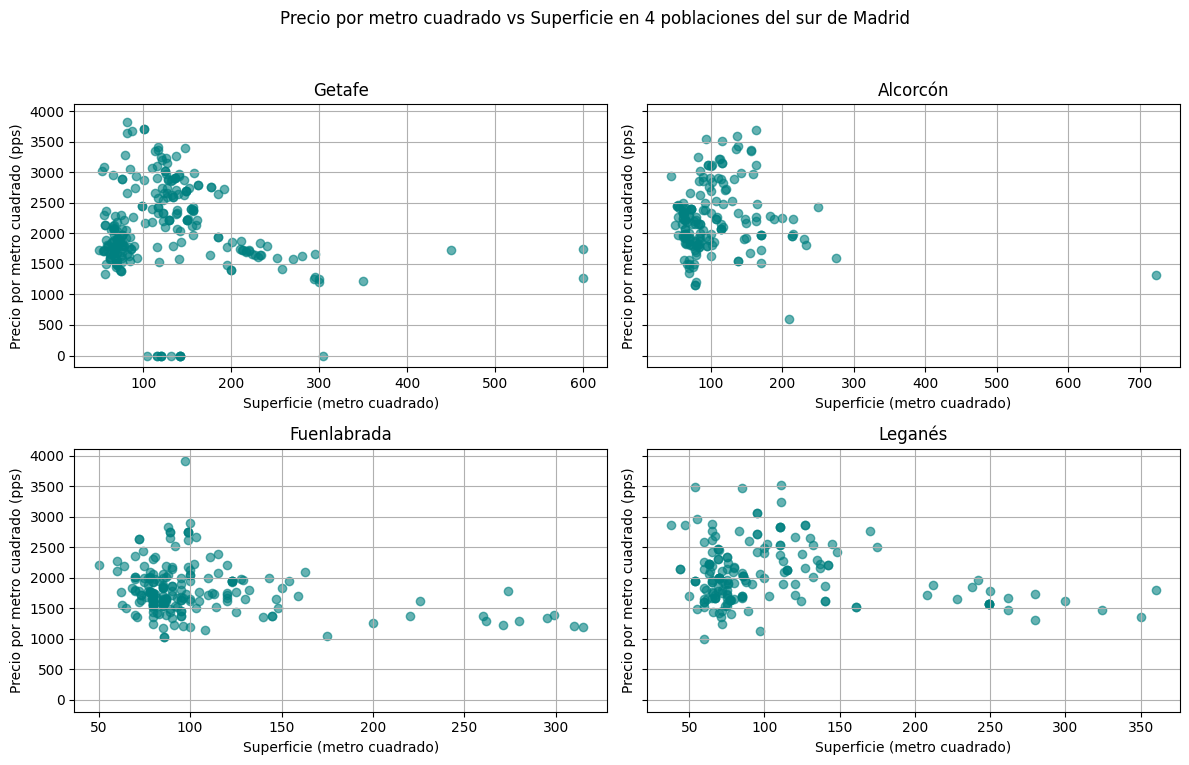

In [26]:
poblaciones = ["Getafe", "Alcorcón", "Fuenlabrada", "Leganés"]
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
for i, poblacion in enumerate(poblaciones):
    ax = axs[i // 2, i % 2]
    datos = df_sur[df_sur["level5"] == poblacion]
    ax.scatter(datos["surface"], datos["pps"], alpha=0.6, label=poblacion, color="teal")
    ax.set_title(poblacion)
    ax.set_xlabel("Superficie (metro cuadrado)")
    ax.set_ylabel("Precio por metro cuadrado (pps)")
    ax.grid(True)
plt.suptitle("Precio por metro cuadrado vs Superficie en 4 poblaciones del sur de Madrid")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




## Exercise 21. 
Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map


In [27]:
new_df = df[df["level5"].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]
new_df

,id_realestates,isnew,realestate_name,phone_realestate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2,level3,level4,level5,level6,level7,level8,upperlevel,latitude,longitude
1,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,40.286740,-3.793510
3,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,40.285379,-3.795081
85,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,2019-12-28 18:30:53.960102+00:00,...,Madrid,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,NaN,Centro,Casco Antiguo,Casco Antiguo,40.350590,-3.826930
94,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,2019-12-28 18:30:53.960102+00:00,...,Madrid,Zona Sur de Madrid,"Leganés, Zona de",Leganés,NaN,Valdepelayo - Montepinos - Arroyo Culebro,NaN,Valdepelayo - Montepinos - Arroyo Culebro,40.319330,-3.775740
109,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,2019-12-28 18:32:32.533794200+00:00,...,Madrid,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,NaN,Prado Santo Domingo - Ensanche,NaN,Prado Santo Domingo - Ensanche,40.331341,-3.831387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,NaT,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Loranca,NaN,Loranca,40.313810,-3.837330
15291,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,NaT,...,Madrid,Zona Sur de Madrid,"Leganés, Zona de",Leganés,NaN,Centro de Leganés,NaN,Centro de Leganés,40.325905,-3.763180
15305,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,NaT,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Fuenlabrada II - El Molino,NaN,Fuenlabrada II - El Molino,40.288219,-3.809862
15322,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,NaT,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,40.282820,-3.788920


In [28]:
!pip install folium

In [29]:
import folium
m = folium.Map(location=[40.35, -3.8], zoom_start=11.5)
for i, row in new_df.iterrows():
    lat = row["latitude"]
    lon = row["longitude"]
    price = row["price"]
    folium.Marker(
        location=[lat, lon],
        tooltip=f"€{price:,.0f}",
        popup=row["address"]
    ).add_to(m)
m


## **conclusiones**
- conclucion 1
Los precios cambian mucho según el lugar:
Las casas no cuestan lo mismo en todas las poblaciones. Por ejemplo, en Pozuelo de Alarcón las viviendas son mucho más caras que en Alcorcón o Getafe. Esto puede ser por el tipo de zona o por los servicios que ofrece.
- conclucion 2
Comparar el precio por metro cuadrado ayuda a entender mejor cuánto vale realmente una casa, sin importar su tamaño. Por ejemplo, aunque dos casas cuesten lo mismo, la que tiene menos metros cuadrados puede estar en una zona más valorada.
- conclucion 3
Usando un mapa interactivo, se pudo ver que las viviendas más caras están en zonas muy concretas, sobre todo en el norte y noroeste de Madrid. Estas áreas suelen tener mejores servicios y estar mejor conectadas.